# Caso de Estudio - Estandarización del conjunto de datos de la planta Iris

In [1]:
import pandas as pd

iris = pd.read_csv("datasets/iris.csv")

iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [2]:
iris.sample(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
18,5.7,3.8,1.7,0.3,Setosa
68,6.2,2.2,4.5,1.5,Versicolor
55,5.7,2.8,4.5,1.3,Versicolor
84,5.4,3.0,4.5,1.5,Versicolor
49,5.0,3.3,1.4,0.2,Setosa


In [3]:
iris["sepal.length"].mean()

5.843333333333334

In [4]:
iris["sepal.length"].std()

0.828066127977863

In [6]:
# 66%
low_66 = iris["sepal.length"].mean() - iris["sepal.length"].std() 
high_66 = iris["sepal.length"].mean() + iris["sepal.length"].std() 

# 95%
low_95 = iris["sepal.length"].mean() - 2 * iris["sepal.length"].std() 
high_95 = iris["sepal.length"].mean() + 2 * iris["sepal.length"].std()

# 99%
low_99 = iris["sepal.length"].mean() - 3 * iris["sepal.length"].std() 
high_99 = iris["sepal.length"].mean() + 3 * iris["sepal.length"].std()

print(f"66% ({low_66}, {high_66})")
print(f"95% ({low_95}, {high_95})")
print(f"99% ({low_99}, {high_99})")

66% (5.015267205355471, 6.671399461311196)
95% (4.187201077377607, 7.49946558928906)
99% (3.3591349493997447, 8.327531717266922)


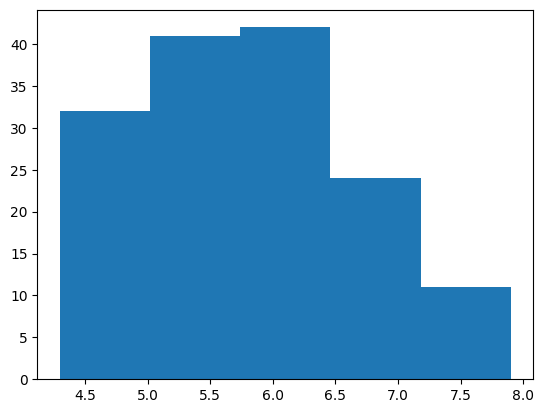

In [9]:
import matplotlib.pyplot as plt

plt.hist(iris["sepal.length"], bins=5)
plt.show()

In [12]:
total_66 = len(iris[ (iris["sepal.length"] >= low_66) & (iris["sepal.length"] <= high_66) ])

total_66 / len(iris) * 100

60.0

In [13]:
total_95 = len(iris[ (iris["sepal.length"] >= low_95) & (iris["sepal.length"] <= high_95) ])

total_95 / len(iris) * 100

96.0

In [14]:
total_99 = len(iris[ (iris["sepal.length"] >= low_99) & (iris["sepal.length"] <= high_99) ])

total_99 / len(iris) * 100

100.0

Al crear la matriz `X` de aprendizaje tenemos distintas columnas representando cada una un eje distinto de datos con su propia escala.

Entonces podemos transformar las escalas propias e independientes, por escalas estandarizadas a su propio valor promedio (`mean value`) y su propia desviación (`deviation`) para obtener un valor medio de cero y una desviación estándar de `1`.

A esto se le conoce como estandarización o ejes gaussianos. 

In [23]:
type(iris[ ["sepal.length", "sepal.width", "petal.length", "petal.width"] ])

pandas.core.frame.DataFrame

In [24]:
type(iris[ ["sepal.length", "sepal.width", "petal.length", "petal.width"] ].values)

numpy.ndarray

In [22]:
X = iris[ ["sepal.length", "sepal.width", "petal.length", "petal.width"] ].values

# NOTA: No olvidar poner .values para pasar de un Dataframe de pandas
#       a una matriz de numpy

X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [26]:
from sklearn.preprocessing import StandardScaler

Xn = StandardScaler().fit_transform(X)

Xn[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

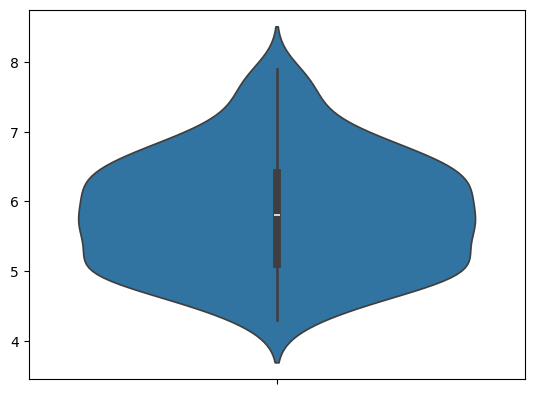

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# X[:, 0] -> Extracción de los valores de la primera columna de X
# X[:, 1] -> Extracción de los valores de la segunda columna de X
# X[:, 2] -> Extracción de los valores de la tercer columna de X
# ...

sns.violinplot(X[:, 0])
plt.show()

In [29]:
X[:, 0].mean()

5.843333333333334

In [30]:
X[:, 0].std()

0.8253012917851409

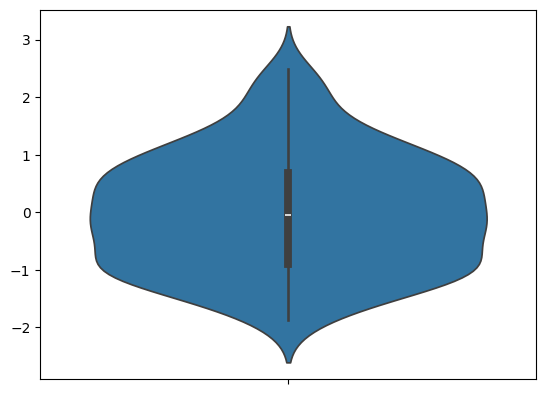

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(Xn[:, 0])
plt.show()

In [31]:
Xn[:, 0].mean()

-4.736951571734001e-16

In [32]:
Xn[:, 0].std()

1.0

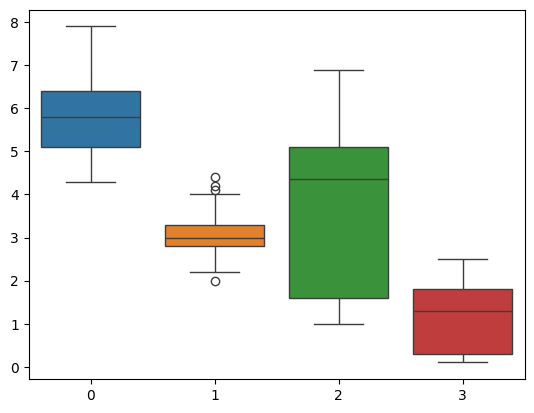

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(X)
plt.show()

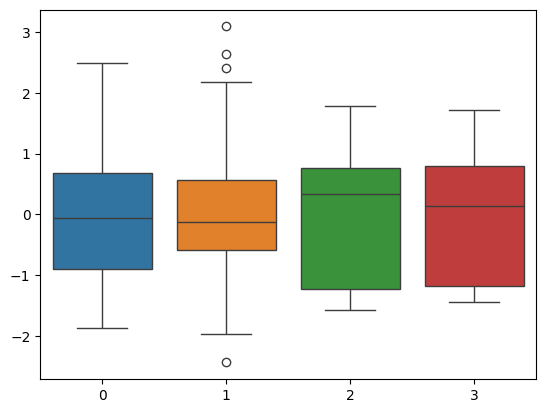

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(Xn)
plt.show()

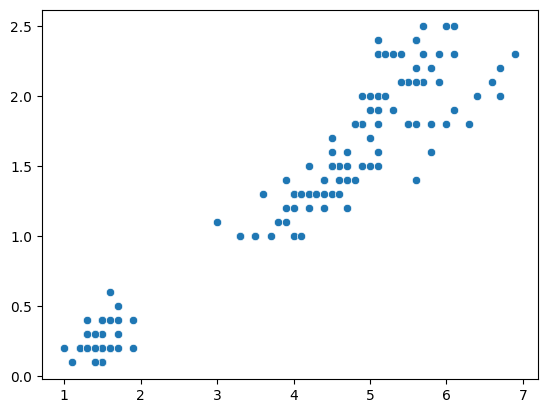

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=X[:, 2], y=X[:, 3])
plt.show()

In [39]:
y = iris["variety"].values

y[:5]

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa'], dtype=object)

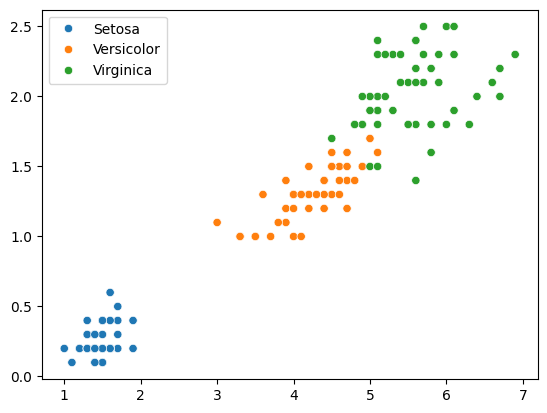

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=X[:, 2], y=X[:, 3], hue=y)
plt.show()

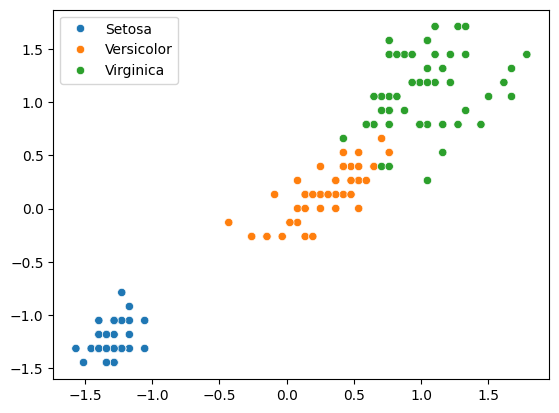

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=Xn[:, 2], y=Xn[:, 3], hue=y)
plt.show()

Clasificamos los datos usando la matriz `X` de características y también usando la matriz `Xn` para comparar la precisión de aprendizaje.

In [47]:
from sklearn.svm import SVC

# Aprendizaje Supervisado por Clasificación
# usando una Máquina de Soporte Vectorial
# con núcleo Lineal
clf = SVC(kernel="linear")

clf.fit(X, y)

clf.score(X, y)

0.9933333333333333

In [48]:
from sklearn.svm import SVC

# Aprendizaje Supervisado por Clasificación
# usando una Máquina de Soporte Vectorial
# con núcleo Lineal
clf = SVC(kernel="linear")

clf.fit(Xn, y)

clf.score(Xn, y)

0.9666666666666667

In [45]:
from sklearn.tree import DecisionTreeClassifier

# Aprendizaje Supervisado por Clasificación
# usando Árboles de Decisión
clf = DecisionTreeClassifier()

clf.fit(X, y)

clf.score(X, y)

1.0

In [46]:
from sklearn.tree import DecisionTreeClassifier

# Aprendizaje Supervisado por Clasificación
# usando Árboles de Decisión
clf = DecisionTreeClassifier()

clf.fit(Xn, y)

clf.score(Xn, y)

1.0